# Beginners Guide to Linear Regression  

Supervised learning is called regression if the dependent variable (aka target) is continuous. Supervised learning is called classification if the dependent variable is discrete. In other words, a regression model outputs a numerical value (a real floating value), but a classification model outputs a class (among two or more classes).

In this practice session, we will discuss linear regression and its implementation with python codes. Regression analysis can be specifically termed linear regression if the dependent variable (target) has a linear relationship with the independent variables (features)

The Math behind Linear Regression
Suppose a collection of data has two variables: one is the independent variable (X), and another is the dependent variable (Y). 

If the relationship between Y and X can be expressed as:

Y = mX + c, this is called linear regression. Here, X is linearly scaled with a weight m to determine the value of Y and c is called bias or y-intercept with which the dependency offsets. A machine learning model has to determine the most suitable values for weight, m and bias, c. If there are more than one independent variable, there will be a corresponding number of weights, w1, w2, w3, and so on.

Typically, a machine learning problem contains a remarkable amount of data. A linear regression model assigns random values to weights and bias at the beginning. When learning commences, the model is fed with one data point in each step. It fits the X values and determines the target. Since weights are randomly assigned initially, the predicted target will differ greatly from the actual target. The model calculates the difference between the actual target value and the predicted target value, which is called the loss. The model scientifically reassigns the values of weights to reduce this loss. With each data point, the model iteratively attempts to find suitable weights that yield minimum loss.

The most preferred losses are mean absolute error (MAE) and mean squared error (MSE). Mean absolute error is the mean value of the sum of differences between predicted and actual target values for all data points. Mean squared error is the mean value of the sum of squares of differences between predicted and actual target values for all data points. Linear regression employs mean squared error (MSE) as its loss function. When learning is finished, the loss value will be at its minimum. In other words, the predicted value will be as close as possible to the actual target value.

To understand the math behind it, please refer [this](https://analyticsindiamag.com/beginners-guide-to-linear-regression-in-python/) article.

# Code Implementation

## Load a Regression Data

Import necessary libraries and modules.

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

Load a regression problem dataset from SciKit-Learn’s in-built datasets. Data is already preprocessed and normalized, and is ready to use.

In [2]:
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

Generate features and target. Visualize the top 5 rows of the data.

In [3]:
features = pd.DataFrame(data['data'], columns=data['feature_names'])
target = pd.Series(data['target'], name='target')
features.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## Simple Linear Regression

Simple linear regression is performed with one dependent variable and one independent variable. In our data, we declare the feature ‘bmi’ to be the independent variable.

Prepare X and y.

In [4]:
X = features['bmi'].values.reshape(-1,1)
y = target.values.reshape(-1,1)

Fit the data to the model

In [5]:
simple = LinearRegression()
simple.fit(X,y)

LinearRegression()

The training is completed. We can explore the weight (coefficient) and bias (intercept) of the trained model.

In [6]:
simple.intercept_

array([152.13348416])

In [7]:
simple.coef_

array([[949.43526038]])

Calculate the predictions following the formula, y = intercept + X*coefficient.

Predictions can also be calculated using the trained model.

In [8]:
calc_pred = simple.intercept_ + (X*simple.coef_)
pred = simple.predict(X)

In [9]:
(calc_pred == pred).all()

True

Plot the actual values and predicted values to get a better understanding.

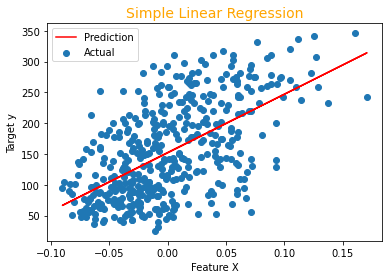

In [10]:
plt.scatter(X,y, label='Actual')
plt.plot(X,pred, '-r', label='Prediction')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.title('Simple Linear Regression', color='orange', size=14)
plt.legend()
plt.show()

According to SciKit-Learn’s LinearRegression method, the above red line is the best possible fit with minimal error value. 

We can calculate the mean squared error value for the above regression using the following code.

Mean Squared Error

In [11]:
mean_squared_error(y, pred)

3890.4565854612724

R-Squared value

CoD gives the ratio of the regression sum of square to the total sum of the square. Total sum of squares (SST) is the sum of deviations of each y value from the mean value of y. Regression sum of squares (SSR) is the difference between the total sum of squares and the sum of squared error (SSE). When there is no error (MSE = 0), CoD becomes unity. When the sum of squared error equals the total sum of squares (SSE = SST), CoD becomes zero.

CoD = 1 refers to the best prediction

CoD = 0 refers to the worst prediction

CoD gives a limit [0,1], thus makes the predictions comparable. CoD is also called R-squared value. It can be calculated using the following code.

In [ ]:
simple.score(X,y)

## Multiple Linear Regression 

Multiple linear regression is performed with more than one independent variable. We choose the following columns as our features.

In [ ]:
columns = ['age', 'bmi', 'bp', 's3', 's5']
columns

Visuaize the data

In [ ]:
for i in columns:
  plt.scatter(features[i], y)
  plt.xlabel(str(i))
  plt.show() 

It is observed that each individual feature has scatteredness in nature. But, the variation in target values for a single input feature value may be explained by some other features. In other words, the target value may find difficulty in fitting a linear regression model with a single feature. Nevertheless, it may yield an improved fit with multiple features by exploring the true pattern in the data.

In the simple linear regression implementation, we have used all our data to fit the model. But, how can we test our model? How far will our model perform on unforeseen data? This is where the train-test-split comes into play. We split our dataset into two sets: a training set and a validation set. We train our model with training data only and evaluate it with the validation set.

Perform Train-Validation split

In [ ]:
from sklearn.model_selection import train_test_split

X = features[columns]
# 70% training data, 30% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=6)

Build a linear regression model and fit the data.

In [ ]:
multi = LinearRegression()
multi.fit(X_train, y_train)

What are the weights (coefficients) of our model? There should be five coefficients each corresponding to each feature.

In [ ]:
multi.coef_

In [ ]:
multi.intercept_

Predictions, error and R-squared value

In [ ]:
pred = multi.predict(X_val)


In [ ]:
mean_squared_error(y_val, pred)

In [ ]:
multi.score(X_train, y_train), multi.score(X_val, y_val)

## Using statsmodels Library 

We have used the SciKit-Learn library so far to perform linear regression. However, we can use the statsmodels library to perform the same task. Fit the training data on the OLS (Ordinary Least Squares) model available in the statsmodels library.

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

Prediction, error calculation

It can be observed that the model weights, intercept and the R-squared value are all identical to the Linear Regression method of the SciKit-Learn library.

The model can be implemented to make predictions on validation data too.

In [ ]:
# Constant (intercept) must be added manually
X_val = sm.add_constant(X_val)
preds = model.predict(X_val)


In [ ]:
mean_squared_error(y_val, preds)

Both methods perform identically